#### Summary
This dataset describes the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.

We are supposed to predict the Final Mandates. 

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import the dataset
df=pd.read_csv("ElectionData.csv")
pd.set_option('display.max_columns',None)
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,10/6/2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,10/6/2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,10/6/2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,10/6/2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,10/6/2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [23]:
# checking the shape of the dataset
df.shape
# There are 26368 rows and seven columns in the dataset

(21643, 28)

In [24]:
# checking the datatypes of the dataset
df.dtypes
# Apart from time district and party all are in numerical datatypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

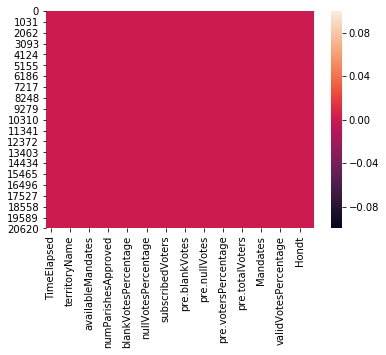

In [25]:
# checking missing data
sns.heatmap(df.isnull())

In [26]:
df.isnull().sum()
# There are no missing values in the dataset

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [27]:
# The time is in object datatype. We need to convert it into Datetime
df['time']=pd.to_datetime(df['time'])
df['time']

0       2019-10-06 20:10:00
1       2019-10-06 20:10:00
2       2019-10-06 20:10:00
3       2019-10-06 20:10:00
4       2019-10-06 20:10:00
                ...        
21638   2019-10-07 00:35:00
21639   2019-10-07 00:35:00
21640   2019-10-07 00:35:00
21641   2019-10-07 00:35:00
21642   2019-10-07 00:35:00
Name: time, Length: 21643, dtype: datetime64[ns]

#### Univariate Analysis

In [28]:
col=[]
value=[]

table=pd.DataFrame([])
for i in df.columns:
    col.append(i)
    value.append(df[i].nunique())

table['col_name']=col
table['values']=value

table

,col_name,values
0,TimeElapsed,54
1,time,54
2,territoryName,21
3,totalMandates,62
4,availableMandates,69
5,numParishes,20
6,numParishesApproved,219
7,blankVotes,329
8,blankVotesPercentage,146
9,nullVotes,331


Observations
1. There are 4029 unique votes, 1387 valid votes percentage, 1363 percentage values.

Attribute Information:

TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
time (timestamp): Date and time of the data acquisition
territoryName (string): Short name of the location (district or nation-wide)
totalMandates (numeric): MP's elected at the moment
availableMandates (numeric): MP's left to elect at the moment
numParishes (numeric): Total number of parishes in this location
numParishesApproved (numeric): Number of parishes approved in this location
blankVotes (numeric): Number of blank votes
blankVotesPercentage (numeric): Percentage of blank votes
nullVotes (numeric): Number of null votes
nullVotesPercentage (numeric): Percentage of null votes
votersPercentage (numeric): Percentage of voters
subscribedVoters (numeric): Number of subscribed voters in the location
totalVoters (numeric): Percentage of blank votes
pre.blankVotes (numeric): Number of blank votes (previous election)
pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
pre.nullVotes (numeric): Number of null votes (previous election)
pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
pre.votersPercentage (numeric): Percentage of voters (previous election)
pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
pre.totalVoters (numeric): Percentage of blank votes (previous election)
Party (string): Political Party
Mandates (numeric): MP's elected at the moment for the party in a given district
Percentage (numeric): Percentage of votes in a party
validVotesPercentage (numeric): Percentage of valid votes in a party
Votes (numeric): Percentage of party votes
Hondt (numeric): Number of MP's according to the distribution of votes now
FinalMandates (numeric): Target: final number of elected MP's in a district/national-level

#### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023834DC59C8>,
      dtype=object)

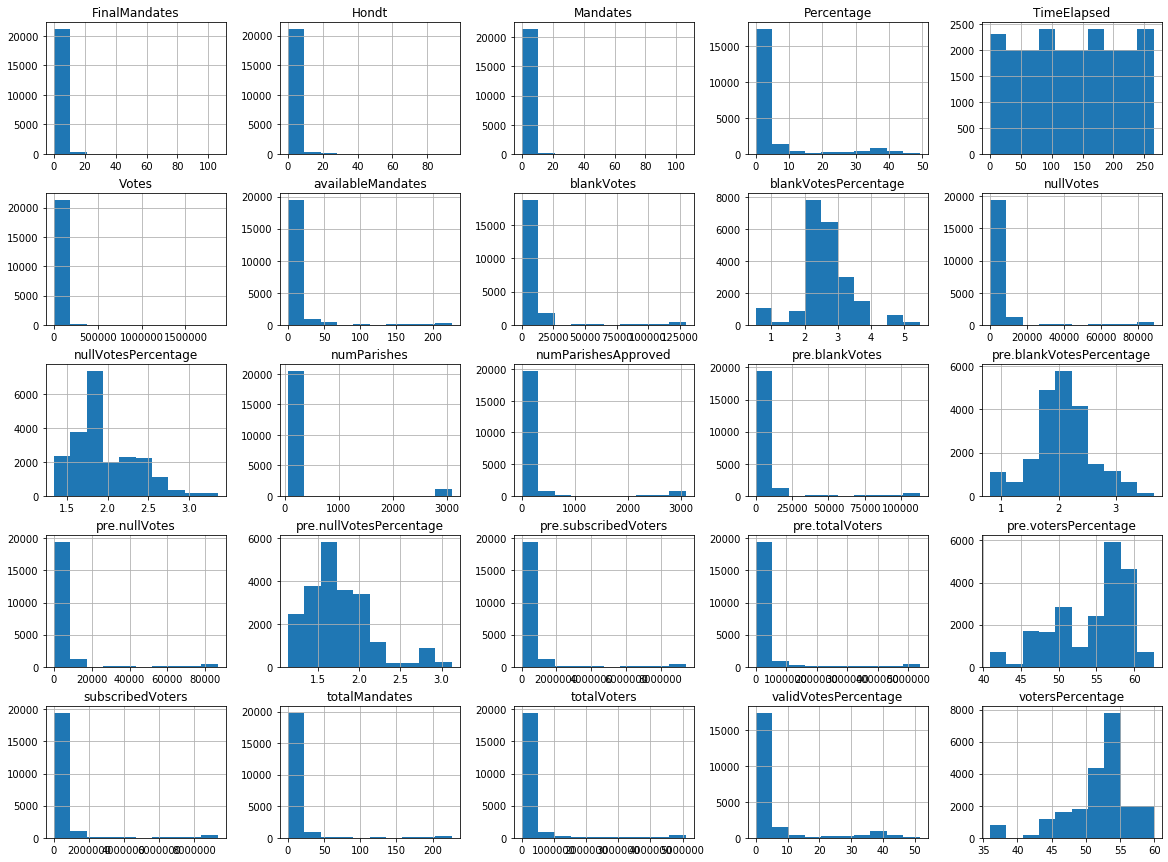

In [36]:
df.hist(figsize=(20,15))

Observations
1. Few columns are symmetric.
2. Few columns are not symmetric which needs to be treated later.

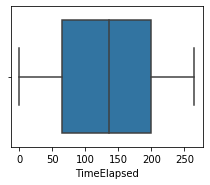

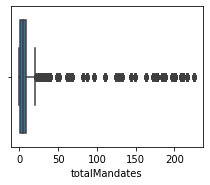

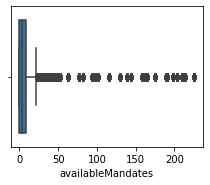

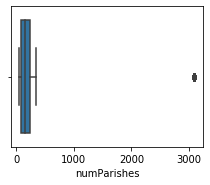

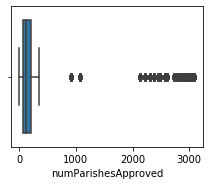

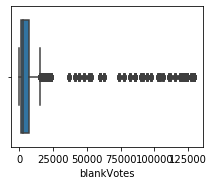

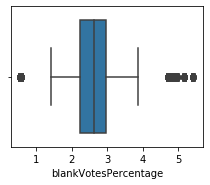

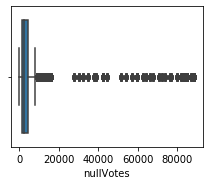

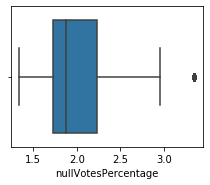

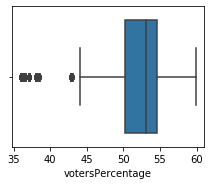

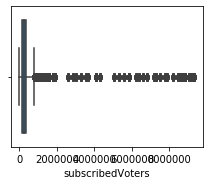

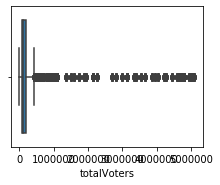

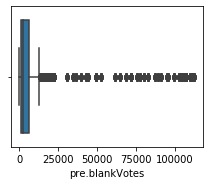

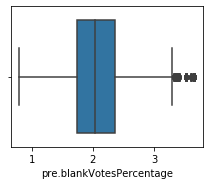

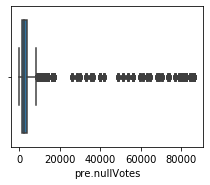

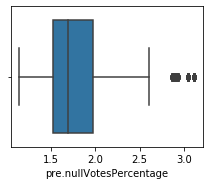

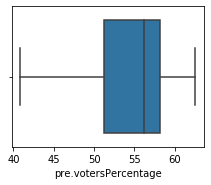

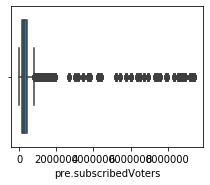

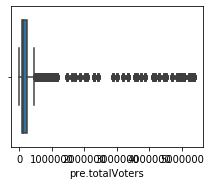

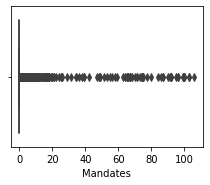

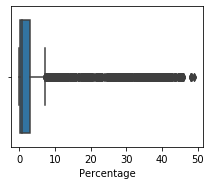

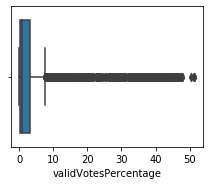

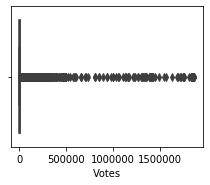

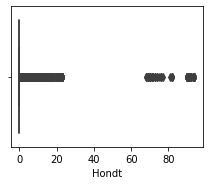

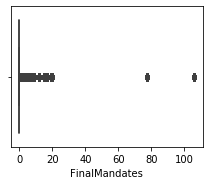

In [48]:
for i in ['TimeElapsed', 'totalMandates','availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates']:
    plt.figure(figsize=(20,15))
    plt.subplot(5,5,5)
    sns.boxplot(df[i])

In [49]:
# There are many outliers in the columns which needs to be removed later

#### Bivariate Analysis

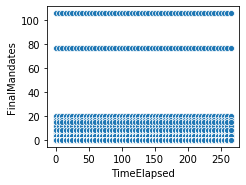

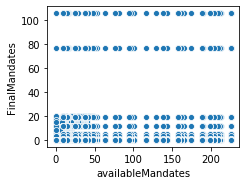

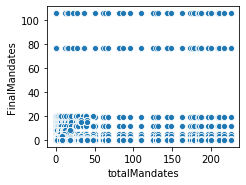

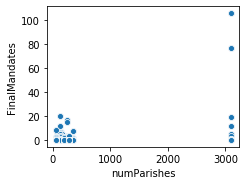

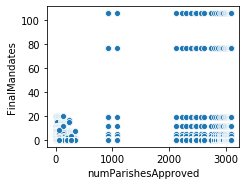

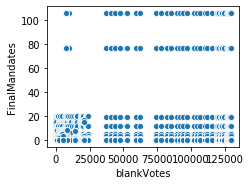

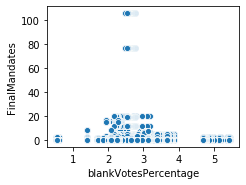

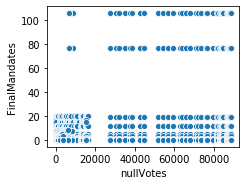

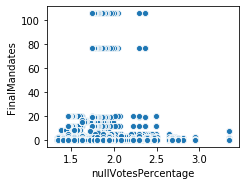

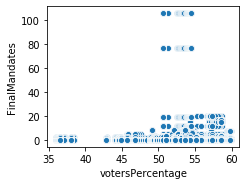

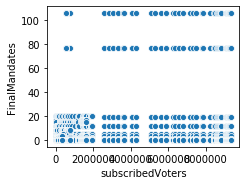

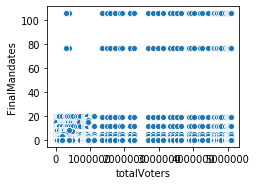

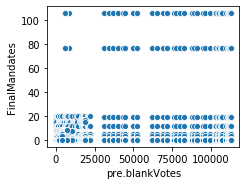

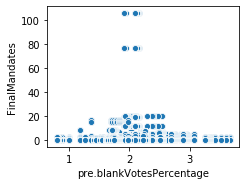

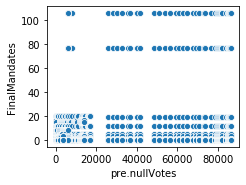

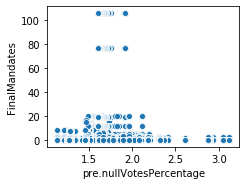

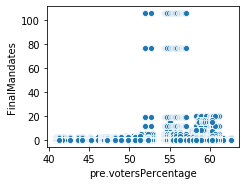

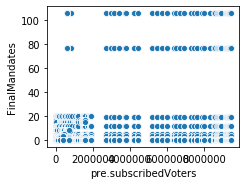

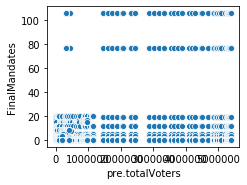

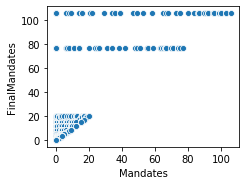

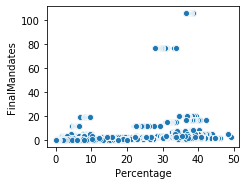

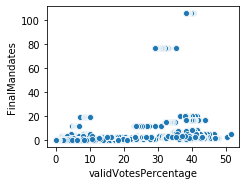

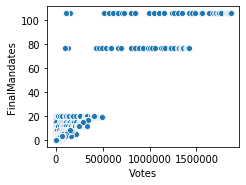

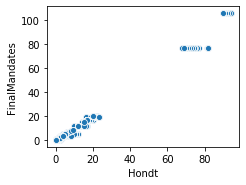

In [59]:
for i in ['TimeElapsed','availableMandates', 'totalMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt']:
    plt.figure(figsize=(20,15))
    plt.subplot(5,5,5)
    sns.scatterplot(x=df[i], y='FinalMandates', data=df)

Observations
1. Mandates, Votes and Handt have positive correlation with the target to some extent, However, the linear relationship is not clear and not well established.
2. No other values show any positive correlation with the target.


In [55]:
df.corr()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,0.195487,0.198243,0.195734,0.093739,0.189902,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,0.974407,0.976336,0.973357,0.034774,0.969992,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,0.385828,0.379093,0.383877,-0.008966,0.399074,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,0.856855,0.850881,0.856779,0.036461,0.864837,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,0.946191,0.940941,0.947190,0.050378,0.951899,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,0.998297,0.997951,0.999657,0.072183,0.997490,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,0.001598,-0.002062,0.030061,0.959142,-0.006067,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,0.998988,0.998405,0.998883,0.041317,0.999298,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,-0.157263,-0.161816,-0.152234,0.100924,-0.141809,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,0.173603,0.190476,0.181595,-0.144312,0.170285,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


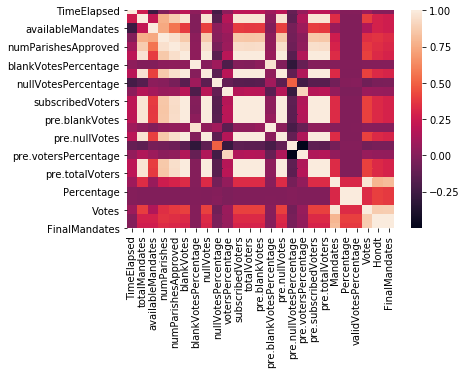

In [58]:
sns.heatmap(df.corr())

Observations
1. We can observe from the map that many columns are positively correlated with each other however, with the target column positive correlation is less.
2. The percentage of votes like blank votes, null votes etc show negative correlation with variables.



In [9]:
df.groupby('Party').sum().sort_values(by='FinalMandates',ascending=False)

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
Party,,,,,,,,,,,,,,,,,,,,,,,,,
PS,150150,12239,12134,332844,280841,9395287,2950.69,6518912,2215.39,58346.06,665766133,359000985,8057433,2329.12,6276852,2003.32,61324.34,676907658,380938145,6068,42490.98,44532.04,132365510,10715,11427
PPD/PSD,150150,12239,12134,332844,280841,9395287,2950.69,6518912,2215.39,58346.06,665766133,359000985,8057433,2329.12,6276852,2003.32,61324.34,676907658,380938145,4444,32768.47,34372.26,103212955,8221,8302
B.E.,150150,12239,12134,332844,280841,9395287,2950.69,6518912,2215.39,58346.06,665766133,359000985,8057433,2329.12,6276852,2003.32,61324.34,676907658,380938145,858,9611.44,10076.67,33526986,2083,2052
PCP-PEV,150150,12239,12134,332844,280841,9395287,2950.69,6518912,2215.39,58346.06,665766133,359000985,8057433,2329.12,6276852,2003.32,61324.34,676907658,380938145,508,7534.69,7868.97,21873464,1354,1296
CDS-PP,150150,12239,12134,332844,280841,9395287,2950.69,6518912,2215.39,58346.06,665766133,359000985,8057433,2329.12,6276852,2003.32,61324.34,676907658,380938145,204,5023.66,5268.54,15564810,843,540
PAN,150150,12239,12134,332844,280841,9395287,2950.69,6518912,2215.39,58346.06,665766133,359000985,8057433,2329.12,6276852,2003.32,61324.34,676907658,380938145,123,2734.94,2867.11,10903515,519,432
CH,150150,12239,12134,332844,280841,9395287,2950.69,6518912,2215.39,58346.06,665766133,359000985,8057433,2329.12,6276852,2003.32,61324.34,676907658,380938145,3,1465.35,1535.24,4499005,183,108
IL,150150,12239,12134,332844,280841,9395287,2950.69,6518912,2215.39,58346.06,665766133,359000985,8057433,2329.12,6276852,2003.32,61324.34,676907658,380938145,28,810.38,849.47,3925509,143,108
L,150150,12239,12134,332844,280841,9395287,2950.69,6518912,2215.39,58346.06,665766133,359000985,8057433,2329.12,6276852,2003.32,61324.34,676907658,380938145,3,810.07,849.43,3427336,119,108


Observations
1. The party PS has obtained more Final mandates, followed by PPD/SSD and later by BE.
2. We can observe that apart from Mandates, Party, Percentage validVotesPercentage, Votes, Hondt and FinalMandates, all other columns are almost common for all parties. There might be slight difference depending on the no. of places the party has contested.
3. Since we have used sum as aggregating function, percentage etc are showing huge values.

### Observation about model building - whether regression or classification
If we observe, we can see that the target final mandate is not showing positive linear relationship with any variables as the final mandate depends on the parties. As party which has won will have more mandates.  

So the problem is not regression, but classification since, the relationship with the target is not linear.

In [60]:
# Lets check the unique values in the target column
df['FinalMandates'].value_counts()

0      17823
1       1134
2        695
3        641
4        378
5        270
8        108
12       108
7         54
6         54
77        54
20        54
19        54
9         54
106       54
17        54
15        54
Name: FinalMandates, dtype: int64

Observations
1. There are 17823 values have zero mandates, followed by 1134 one mandate and 54 values had 106 highest mandate.

We can convert them into bins of 0-5, 5-10, 11-15, 16-20, 75-110 after removing outliers.


##### Label Encoder

In [78]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='O':
        df[i]=lb.fit_transform(df[i])

##### removing outliers

In [80]:
from scipy.stats import zscore
print("The shape of the dataframe before removing outliers is", df.shape)
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("The shape of the dataframe before removing outliers is", df1.shape)

The shape of the dataframe before removing outliers is (21643, 28)
The shape of the dataframe before removing outliers is (18333, 28)


In [81]:
df.dtypes

TimeElapsed                   int64
time                          int32
territoryName                 int32
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                         int32
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [82]:
# creating bins for the target data
bins=[0,5,10,15,20,np.inf]
names=['0-5','5-10','10-15','15-20','75-110']
df1['Finalmandate_range']=pd.cut(df1['FinalMandates'],bins,labels=names)
df1['Finalmandate_range']
# few missing values Nan are created with needs to treated later

22       5-10
23        0-5
24        0-5
25        NaN
26        NaN
         ... 
21638     NaN
21639     NaN
21640     NaN
21641     NaN
21642     NaN
Name: Finalmandate_range, Length: 18333, dtype: category
Categories (5, object): [0-5 < 5-10 < 10-15 < 15-20 < 75-110]

In [84]:
df1['FinalMandates'].value_counts()
# note that the no. of counts of '0' are 16154

0     16154
1       900
3       413
2       316
4       206
5        93
12       54
7        54
8        46
6        45
15       43
20        9
Name: FinalMandates, dtype: int64

In [85]:
df1['Finalmandate_range'].value_counts()

0-5       1928
5-10       145
10-15       97
15-20        9
75-110       0
Name: Finalmandate_range, dtype: int64

In [103]:
df1['Finalmandate_range'].isnull().sum()
# note that the null value counts is 16154. With reference with the above, we can understand that '0' is replaced with Nan.
#.... so we need to reclassify Nan into 0-5 group manually

16154

In [105]:
# classifying the null values into proper group 0-5
df1['Finalmandate_range']=df1['Finalmandate_range'].fillna('0-5')
df1['Finalmandate_range'].value_counts()

0-5       18082
5-10        145
10-15        97
15-20         9
75-110        0
Name: Finalmandate_range, dtype: int64

#### splitting the data into input and output variables
The data will be split into input and output variables. 

In [106]:
df1.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Finalmandate_range
22,0,0,0,0,16,147,12,186,2.92,101,1.59,53.3,11953,6371,124,1.82,111,1.63,54.56,12511,6826,17,0,34.33,35.95,2187,7,7,5-10
23,0,0,0,0,16,147,12,186,2.92,101,1.59,53.3,11953,6371,124,1.82,111,1.63,54.56,12511,6826,1,0,7.47,7.82,476,1,2,0-5
24,0,0,0,0,16,147,12,186,2.92,101,1.59,53.3,11953,6371,124,1.82,111,1.63,54.56,12511,6826,2,0,6.14,6.43,391,1,1,0-5
25,0,0,0,0,16,147,12,186,2.92,101,1.59,53.3,11953,6371,124,1.82,111,1.63,54.56,12511,6826,11,0,2.39,2.50,152,0,0,0-5
26,0,0,0,0,16,147,12,186,2.92,101,1.59,53.3,11953,6371,124,1.82,111,1.63,54.56,12511,6826,10,0,2.04,2.14,130,0,0,0-5


In [107]:
x=df1.iloc[:,0:-1]
y=pd.DataFrame(df1.iloc[:,-1])
x.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
22,0,0,0,0,16,147,12,186,2.92,101,1.59,53.3,11953,6371,124,1.82,111,1.63,54.56,12511,6826,17,0,34.33,35.95,2187,7,7
23,0,0,0,0,16,147,12,186,2.92,101,1.59,53.3,11953,6371,124,1.82,111,1.63,54.56,12511,6826,1,0,7.47,7.82,476,1,2
24,0,0,0,0,16,147,12,186,2.92,101,1.59,53.3,11953,6371,124,1.82,111,1.63,54.56,12511,6826,2,0,6.14,6.43,391,1,1
25,0,0,0,0,16,147,12,186,2.92,101,1.59,53.3,11953,6371,124,1.82,111,1.63,54.56,12511,6826,11,0,2.39,2.50,152,0,0
26,0,0,0,0,16,147,12,186,2.92,101,1.59,53.3,11953,6371,124,1.82,111,1.63,54.56,12511,6826,10,0,2.04,2.14,130,0,0


In [108]:
y.head()

,Finalmandate_range
22,5-10
23,0-5
24,0-5
25,0-5
26,0-5


#### Checking the skewness in the datasets

In [109]:
x.skew()

TimeElapsed                -0.024110
time                       -0.024110
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
F

In [110]:
#using log1p method to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [111]:
x.skew()

TimeElapsed                -0.024110
time                       -0.024110
territoryName               0.034073
totalMandates               0.020702
availableMandates           0.503375
numParishes                -0.138265
numParishesApproved        -1.099103
blankVotes                 -0.592756
blankVotesPercentage       -0.844508
nullVotes                  -0.880145
nullVotesPercentage         0.329675
votersPercentage           -0.392023
subscribedVoters           -0.772107
totalVoters                -0.647681
pre.blankVotes             -0.642916
pre.blankVotesPercentage   -0.410446
pre.nullVotes              -0.937998
pre.nullVotesPercentage     0.628444
pre.votersPercentage       -0.514215
pre.subscribedVoters       -0.802802
pre.totalVoters            -0.670218
Party                       0.009657
Mandates                    4.479200
Percentage                  1.565493
validVotesPercentage        1.550088
Votes                       0.268973
Hondt                       3.488567
F

In [112]:
#using sqrt method to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [113]:
x.skew()
#skewness is reduced to a large extent

TimeElapsed                -0.024110
time                       -0.024110
territoryName               0.034073
totalMandates               0.020702
availableMandates           0.503375
numParishes                -0.138265
numParishesApproved        -1.099103
blankVotes                 -0.592756
blankVotesPercentage       -0.844508
nullVotes                  -0.880145
nullVotesPercentage         0.329675
votersPercentage           -0.392023
subscribedVoters           -0.772107
totalVoters                -0.647681
pre.blankVotes             -0.642916
pre.blankVotesPercentage   -0.410446
pre.nullVotes              -0.937998
pre.nullVotesPercentage     0.441833
pre.votersPercentage       -0.514215
pre.subscribedVoters       -0.802802
pre.totalVoters            -0.670218
Party                       0.009657
Mandates                    3.674757
Percentage                  0.932295
validVotesPercentage        0.921731
Votes                       0.268973
Hondt                       2.706402
F

In [114]:
#Scaling the data

In [115]:
#We need to scale the data for normalising the input data and for the same we can use Minmaxscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-1.752045,-1.752045,-1.741356,-1.454853,1.362509,0.168399,-2.386279,-1.995387,0.540356,-2.548819,-1.079287,0.18551,-2.374963,-2.316742,-2.268273,-0.45199,-2.471572,-0.312112,-0.133418,-2.407375,-2.386617,1.177919,-0.266426,2.505502,2.496241,0.519213,3.757070,3.687393
1,-1.752045,-1.752045,-1.741356,-1.454853,1.362509,0.168399,-2.386279,-1.995387,0.540356,-2.548819,-1.079287,0.18551,-2.374963,-2.316742,-2.268273,-0.45199,-2.471572,-0.312112,-0.133418,-2.407375,-2.386617,-1.435236,-0.266426,1.523805,1.522741,-0.260514,2.021925,2.582619
2,-1.752045,-1.752045,-1.741356,-1.454853,1.362509,0.168399,-2.386279,-1.995387,0.540356,-2.548819,-1.079287,0.18551,-2.374963,-2.316742,-2.268273,-0.45199,-2.471572,-0.312112,-0.133418,-2.407375,-2.386617,-1.271914,-0.266426,1.386464,1.386704,-0.360975,2.021925,1.977914
3,-1.752045,-1.752045,-1.741356,-1.454853,1.362509,0.168399,-2.386279,-1.995387,0.540356,-2.548819,-1.079287,0.18551,-2.374963,-2.316742,-2.268273,-0.45199,-2.471572,-0.312112,-0.133418,-2.407375,-2.386617,0.197986,-0.266426,0.702331,0.705693,-0.842575,-0.348328,-0.357277
4,-1.752045,-1.752045,-1.741356,-1.454853,1.362509,0.168399,-2.386279,-1.995387,0.540356,-2.548819,-1.079287,0.18551,-2.374963,-2.316742,-2.268273,-0.45199,-2.471572,-0.312112,-0.133418,-2.407375,-2.386617,0.034664,-0.266426,0.586135,0.591956,-0.922041,-0.348328,-0.357277


#### deriving the best random_state for splitting the data into train and test

In [116]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def max_acc_score(reg,x,y):
    max_acc_score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The max accuracy score ", max_acc_score, "is achieved at", final_r_state)
    return final_r_state

In [117]:
#Checking the DecisionTreeClassifier for the above (we cannot use logistic as it is not binary classification)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

max_acc_score(dt,x,y)

The max accuracy score  1.0 is achieved at 42


42

In [118]:
#We need to finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.20)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(14666, 28)
(14666, 1)
(3667, 28)
(3667, 1)


We need to check the performance of other modules and their scores. For the same we need to use GridSearchCV to select best parameters for the models

### GridSearchCV for selecting best parameters

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_


{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [120]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [121]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'linear'}

In [122]:
#After obtaining best parameters, we should now check the models

In [125]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

score=[]
cv=[]


algorithms=[KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='distance'), DecisionTreeClassifier(criterion= 'gini', splitter= 'best'), SVC(C=1, kernel='linear')]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    print(confusion_matrix(test_y,pred))
    print()
    print()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

The accuracy score is  1.0

The cross val score is 0.9929116684841877

              precision    recall  f1-score   support

         0-5       1.00      1.00      1.00      3622
       10-15       1.00      1.00      1.00        18
       15-20       1.00      1.00      1.00         1
        5-10       1.00      1.00      1.00        26

    accuracy                           1.00      3667
   macro avg       1.00      1.00      1.00      3667
weighted avg       1.00      1.00      1.00      3667


[[3622    0    0    0]
 [   0   18    0    0]
 [   0    0    1    0]
 [   0    0    0   26]]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=N

In [126]:
result=pd.DataFrame({'Model':[KNeighborsClassifier, DecisionTreeClassifier, SVC],'Accuracy_Score':score,'Cross_val_score':cv})
result

,Model,Accuracy_Score,Cross_val_score
0,<class 'sklearn.neighbors.classification.KNeig...,1.0,0.992912
1,<class 'sklearn.tree.tree.DecisionTreeClassifi...,1.0,0.999073
2,<class 'sklearn.svm.classes.SVC'>,1.0,0.981897


By comparing the above results, we can conclude that DecisionTree is the best model which is giving best results with good cross val score

In [129]:
#Let us finalise the DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'gini', splitter= 'best')
dt.fit(train_x,train_y)
pred=dt.predict(test_x)
acc_score=accuracy_score(test_y,pred)
crossval=cross_val_score(dt,x,y,cv=5,scoring='accuracy').mean()
print("The accuracy score is", acc_score)
print("The cross validation score is", crossval)
pd.DataFrame(pred).to_csv("Project19_Election results_csv")

The accuracy score is 1.0
The cross validation score is 0.9995092693565976


In [128]:
from sklearn.externals import joblib
joblib.dump(dt,'DecisionTreeClassifier.pkl')

['DecisionTreeClassifier.pkl']